# Categorizing ship data based on climate zones and data density

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from typing import List, Tuple
import re

## Assigning each datapoint into a grid
Here we assign each ship data point into a n-by-n grid (here we use 1-by-1).

In [2]:
grid_size_lat = 1
grid_size_lon = 1

In [3]:
ship_data_csv_path = "/Users/Sienna/Desktop/ICOADS_R3.0_Rqst747821_17950101-18360101.csv"

ship_df = pd.read_csv(ship_data_csv_path)
ship_df["grid_group"] = None

/Users/Sienna/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (61) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
min_lat = -90
max_lat = 90
min_lon = 0
max_lon = 360

# lists of dividing lines in lat and lon
lat_grid_points = list(range(min_lat, max_lat+1, grid_size_lat))
lon_grid_points = list(range(min_lon, max_lon+1, grid_size_lon))

In [5]:
# iterate through the rows to assign a grid group
# the grid group is in the form of (x, y) == the bottom-left point of the grid

# keep counts of how many times each grid group appears
grid_group_counts = {}

for index, row in ship_df.iterrows():
    lat = row["LAT"]
    lon = row["LON"]
    
    assigned_lat = -1
    assigned_lon = -1
    
    for lat_grid_point in lat_grid_points:
        if lat < lat_grid_point:
#             if (lat-(lat_grid_point - grid_size_lat)) <= (lat_grid_point-lat):
#                 assigned_lat = lat_grid_point - grid_size_lat
#             else:
#                 assigned_lat = lat_grid_point
            assigned_lat = lat_grid_point - grid_size_lat
            break
            
    for lon_grid_point in lon_grid_points:
        if lon < lon_grid_point:
#             if (lon-(lon_grid_point - grid_size_lon)) <= (lon_grid_point-lon):
#                 assigned_lon = lon_grid_point - grid_size_lon
#             else:
#                 assigned_lon = lon_grid_point
            assigned_lon = lon_grid_point - grid_size_lon
            break
    
    grid_group = (assigned_lon, assigned_lat)
    
    ship_df.at[index, "grid_group"] = grid_group
    
    # increase count
    if grid_group in grid_group_counts:
        grid_group_counts[grid_group] += 1
    else:
        grid_group_counts[grid_group] = 1
    

In [6]:
ship_df.to_csv('/Users/Sienna/Desktop/grid_ICOADS_R3.0_Rqst747821_17950101-18360101.csv', index=False)

We keep track of the data density of each grid group so we can decide later on whether a grid is high-density or low-density.

In [7]:
grid_group_counts

{(71, -37): 36,
 (72, -36): 41,
 (79, -7): 33,
 (74, -35): 33,
 (75, -35): 20,
 (76, -34): 27,
 (75, -33): 25,
 (76, -33): 27,
 (77, -32): 31,
 (78, -32): 33,
 (80, -31): 18,
 (81, -30): 28,
 (82, -28): 24,
 (103, -7): 78,
 (89, 19): 142,
 (83, -25): 20,
 (102, -7): 15,
 (84, -22): 24,
 (102, -8): 73,
 (88, 18): 112,
 (83, -21): 40,
 (101, -8): 27,
 (83, -19): 51,
 (101, -9): 60,
 (87, 17): 74,
 (82, -18): 57,
 (87, 16): 62,
 (82, -16): 48,
 (100, -10): 47,
 (85, 15): 37,
 (82, -14): 38,
 (99, -10): 36,
 (82, -12): 47,
 (84, -11): 35,
 (99, -11): 29,
 (85, -10): 61,
 (98, -11): 31,
 (75, 9): 66,
 (86, -8): 45,
 (97, -12): 18,
 (75, 8): 23,
 (86, -6): 48,
 (95, -13): 21,
 (76, 8): 99,
 (87, -5): 80,
 (94, -14): 36,
 (88, -4): 56,
 (93, -15): 37,
 (76, 7): 67,
 (90, -1): 73,
 (92, -15): 34,
 (77, 7): 87,
 (109, 10): 146,
 (91, 0): 55,
 (74, 6): 2,
 (107, 8): 73,
 (93, 1): 86,
 (88, -16): 35,
 (79, 6): 93,
 (105, 6): 29,
 (106, 6): 133,
 (93, 2): 64,
 (80, 4): 78,
 (104, 4): 21,
 (92, 3):

In [8]:
# Convert grid_group_counts to list of tuples to create a dataframe later
grid_density_data = [(lon, lat, count) for (lon, lat), count in grid_group_counts.items()]

# Create DataFrame
grid_count_df = pd.DataFrame(grid_density_data, columns=['lon', 'lat', 'count'])

grid_count_df.to_csv('/Users/Sienna/Desktop/grid_count.csv', index=False)

Now we would like to visualize how often a density occurs. This can help us decide the threshold that divides high-density and low-density.

In [9]:
# a dict with count as key and a the frequency of that count as value
grid_group_counts_reverse = {}

for grid_group, count in grid_group_counts.items():
    if count in grid_group_counts_reverse:
        grid_group_counts_reverse[count] += 1
    else:
        grid_group_counts_reverse[count] = 1
        
sorted_counts = {key: grid_group_counts_reverse[key] for key in sorted(grid_group_counts_reverse)}

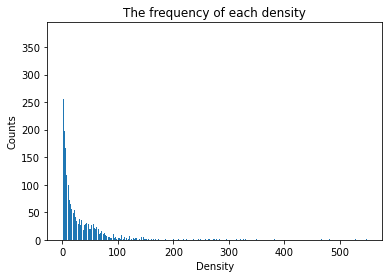

In [10]:
keys = list(sorted_counts.keys())
values = list(sorted_counts.values())

# Create a bar plot
plt.bar(keys, values)

# Add titles and labels
plt.xlabel('Density')
plt.ylabel('Counts')
plt.title('The frequency of each density')

# Show the plot
plt.show()

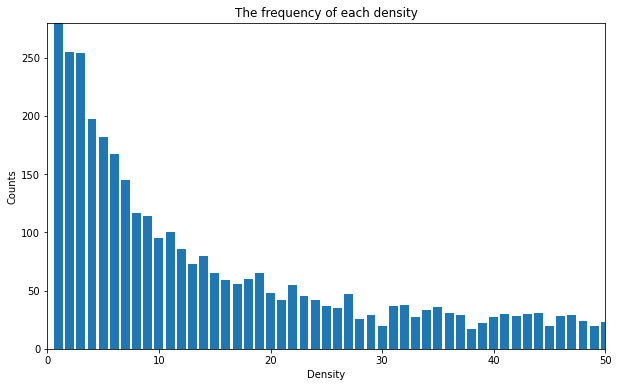

In [11]:
# Let's zoom in the graph

keys = list(sorted_counts.keys())
values = list(sorted_counts.values())

plt.figure(figsize=(10, 6))

plt.xlim(0, 50)
plt.ylim(0, 280)

# Create a bar plot
plt.bar(keys, values)

# Add titles and labels
plt.xlabel('Density')
plt.ylabel('Counts')
plt.title('The frequency of each density')

# Show the plot
plt.show()

## Categorizing the grids into climate zones

The climate zones are based on the [IPCC WGI Interactive Atlas.](https://interactive-atlas.ipcc.ch/regional-information#eyJ0eXBlIjoiQVRMQVMiLCJjb21tb25zIjp7ImxhdCI6OTc3MiwibG5nIjo0MDA2OTIsInpvb20iOjQsInByb2oiOiJFUFNHOjU0MDMwIiwibW9kZSI6ImNvbXBsZXRlX2F0bGFzIn0sInByaW1hcnkiOnsic2NlbmFyaW8iOiJzc3A1ODUiLCJwZXJpb2QiOiIyIiwic2Vhc29uIjoieWVhciIsImRhdGFzZXQiOiJDTUlQNiIsInZhcmlhYmxlIjoidGFzIiwidmFsdWVUeXBlIjoiQU5PTUFMWSIsImhhdGNoaW5nIjoiU0lNUExFIiwicmVnaW9uU2V0IjoiYXI2IiwiYmFzZWxpbmUiOiJwcmVJbmR1c3RyaWFsIiwicmVnaW9uc1NlbGVjdGVkIjpbXX0sInBsb3QiOnsiYWN0aXZlVGFiIjoicGx1bWUiLCJtYXNrIjoibm9uZSIsInNjYXR0ZXJZTWFnIjpudWxsLCJzY2F0dGVyWVZhciI6bnVsbCwic2hvd2luZyI6ZmFsc2V9fQ==). We use the point-in-polygon (PIP) test with ray-casting algorithm to categorize the grids.

In [12]:
# generate a list of all cooridinates
coords = []

for lon_grid_point in lon_grid_points:
    for lat_grid_point in lat_grid_points:
        coords.append((lon_grid_point, lat_grid_point))

In [13]:
# define climate zones by the end points of the zone
# for border issue I will list the zone in reverse
climate_zones = {
    4: [(31, -45), (31, -36), (110, -36), (110, -45)],
    3: [(31, -36), (37.36, -25.6), (50.5, -25.6), (50.5, -10), (110, -10), (110, -36)],
    2: [(46.5, -10), (46.5, 2.25), (53, 7), (93, 7), (93, -10)],
    1: [(79, 7), (87, 19.5), (93, 19.5), (93, 7)]
}

In [14]:
# Ray-casting algorithm to check if a point is in a polygon
def is_point_on_line_segment(point: Tuple[float, float], line_start: Tuple[float, float], line_end: Tuple[float, float]) -> bool:
    """Check if a point is on a line segment defined by two points."""
    px, py = point
    sx, sy = line_start
    ex, ey = line_end

    # Check if point is within the bounding box of the line segment
    if min(sx, ex) <= px <= max(sx, ex) and min(sy, ey) <= py <= max(sy, ey):
        # Check if the cross product of (point - start) and (end - start) is zero
        if (px - sx) * (ey - sy) == (py - sy) * (ex - sx):
            return True
    return False

def is_point_in_polygon(point: Tuple[float, float], polygon: List[Tuple[float, float]]) -> bool:
    """Check if a point is inside a polygon or on its boundary."""
    x, y = point
    n = len(polygon)
    inside = False

    p1x, p1y = polygon[0]
    for i in range(n + 1):
        p2x, p2y = polygon[i % n]
        
        # Check if the point is on the boundary
        if is_point_on_line_segment(point, (p1x, p1y), (p2x, p2y)):
            return True
        
        if y > min(p1y, p2y):
            if y <= max(p1y, p2y):
                if x <= max(p1x, p2x):
                    if p1y != p2y:
                        xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                    if p1x == p2x or x <= xinters:
                        inside = not inside
        p1x, p1y = p2x, p2y

    return inside

# Function to categorize coordinates into climate zones
def categorize_coordinates(coords: List[Tuple[float, float]], zones: dict) -> List[str]:
    categories = []
    for coord in coords:
        categorized = False
        for zone_num, zone_polygon in zones.items():
            if is_point_in_polygon(coord, zone_polygon):
                categories.append(zone_num)
                categorized = True
                break
        if not categorized:
            categories.append(-1)
    return categories

In [15]:
# a dict of {(lon, lat): climate_zone}
coords_zone = {}

categories = categorize_coordinates(coords, climate_zones)

for coord_i, coord in enumerate(coords):
    coords_zone[coord] = categories[coord_i]

In [16]:
# append the zone information to the csv file
ship_data_csv_path = "/Users/Sienna/Desktop/grid_ICOADS_R3.0_Rqst747821_17950101-18360101.csv"

ship_df = pd.read_csv(ship_data_csv_path)
ship_df["climate_zone"] = None

for index, row in ship_df.iterrows():
    grid_group = eval(row["grid_group"])
    ship_df.at[index, "climate_zone"] = coords_zone[grid_group]
    
ship_df.to_csv('/Users/Sienna/Desktop/grid_ICOADS_R3.0_Rqst747821_17950101-18360101.csv', index=False)

In [17]:
ship_df.head()

,YR,MO,DY,HR,LAT,LON,IM,ATTC,TI,LI,...,LZ,QCZ,UID,RN1,RN2,RN3,RSA,IRF,grid_group,climate_zone
0,1795,1,1.0,7.0,-36.25,71.80,1,3,0.0,5,...,NaN,NaN,CZ3PLG,3,0,0,2,1,"(71, -37)",4
1,1795,1,2.0,7.0,-35.57,72.65,1,3,0.0,5,...,NaN,NaN,CZ3PLM,3,0,0,2,1,"(72, -36)",4
2,1795,1,3.0,7.0,-6.23,79.98,1,3,0.0,5,...,NaN,NaN,CZ3PLR,3,0,0,2,1,"(79, -7)",2
3,1795,1,3.0,7.0,-34.78,74.67,1,3,0.0,5,...,NaN,NaN,CZ3PLS,3,0,0,2,1,"(74, -35)",3
4,1795,1,4.0,7.0,-34.47,75.60,1,3,0.0,5,...,NaN,NaN,CZ3PLY,3,0,0,2,1,"(75, -35)",3


In [18]:
# Let's add the climate zone info into the grid count csv
grid_count_df_path = "/Users/Sienna/Desktop/grid_count.csv"

grid_count_df = pd.read_csv(grid_count_df_path)

grid_count_df["climate_zone"] = None
for index, row in grid_count_df.iterrows():
    lon = row["lon"]
    lat = row["lat"]   
    grid_group = (lon, lat)
    grid_count_df.at[index, "climate_zone"] = coords_zone[grid_group]
    
grid_count_df.to_csv(grid_count_df_path, index=False)

## Deciding threshold


In [ ]:
# division is:    low  threshold[0]  median  threshold[1]   high
# threshold for each climate zone
thresholds = {1: (0, 0), # have to be the same
              2: (32.8, 32.8), # have to be the same
              3: (20, 40),  # two different values
              4: (30, 30)} # have to be the same

In [19]:
# coord grid that has low, median, or high density
low_coords = []
median_coords = []
high_coords = []

for zone, threshold in thresholds.items():
    zone_df = ship_df[ship_df["climate_zone"]==zone]
    zone_val_counts = zone_df['grid_group'].value_counts().to_dict()
    
    for coord, count in zone_val_counts.items():
        if count <= threshold[0]:
            low_coords.append(coord)
        elif count <= threshold[1]:
            median_coords.append(coord)
        else:
            high_coords.append(coord)

In [20]:
ship_data_csv_path = "/Users/Sienna/Desktop/grid_ICOADS_R3.0_Rqst747821_17950101-18360101.csv"

ship_df = pd.read_csv(ship_data_csv_path)

ship_df["density"] = None

for index, row in ship_df.iterrows():
    grid_group = row["grid_group"]
    if grid_group in low_coords:
        ship_df.at[index, "density"] = 'low'
    elif grid_group in median_coords:
        ship_df.at[index, "density"] = 'median'
    elif grid_group in high_coords:
        ship_df.at[index, "density"] = 'high'

ship_df.to_csv('/Users/Sienna/Desktop/grid_thres_ICOADS_R3.0_Rqst747821_17950101-18360101.csv', index=False)

/Users/Sienna/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (61) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
# Let's create a csv that is specific to density info

grid_density_df_path = "/Users/Sienna/Desktop/grid_count.csv"

grid_density_df = pd.read_csv(grid_density_df_path)

grid_density_df["density"] = None

for index, row in grid_density_df.iterrows():
    lon = row["lon"]
    lat = row["lat"]   
    grid_group = str((lon, lat))
    
    if grid_group in low_coords:
        grid_density_df.at[index, "density"] = 'low'
    elif grid_group in median_coords:
        grid_density_df.at[index, "density"] = 'median'
    elif grid_group in high_coords:
        grid_density_df.at[index, "density"] = 'high'

grid_density_df.to_csv('/Users/Sienna/Desktop/grid_thres.csv', index=True)

In [22]:
# a grid density csv that disregards all data points outside of specified climate zones

grid_density_df_path = '/Users/Sienna/Desktop/grid_thres.csv'

grid_density_df = pd.read_csv(grid_density_df_path)

# Drop rows where 'density' has no value
grid_df_cleaned = grid_density_df.dropna(subset=['density'])

grid_df_cleaned.to_csv('/Users/Sienna/Desktop/grid_thres_clean.csv', index=False)

# EDA

In [23]:
# zone 2
percentile = 10

grid_count_df_path = '/Users/Sienna/Desktop/grid_count.csv'

grid_count_df = pd.read_csv(grid_count_df_path)

# Drop rows where 'density' has no value
desired_zone2 = grid_count_df[(grid_count_df["climate_zone"] == 2) & (grid_count_df["lon"] >= 87)]

counts = []
for index, row in desired_zone2.iterrows():
    counts.append(row["count"])
    
counts = sorted(counts)

print(f'{percentile}th percentile: {np.percentile(counts, 10)}')

10th percentile: 32.8


In [24]:
# zone 3
percentile = 10

grid_count_df_path = '/Users/Sienna/Desktop/grid_count.csv'

grid_count_df = pd.read_csv(grid_count_df_path)

# Drop rows where 'density' has no value
desired_zone3 = grid_count_df[(grid_count_df["climate_zone"] == 2) & (grid_count_df["lon"] >= 87)]

counts = []
for index, row in desired_zone2.iterrows():
    counts.append(row["count"])
    
counts = sorted(counts)

print(f'{percentile}th percentile: {np.percentile(counts, 10)}')

10th percentile: 32.8


# Categorize points into target climate zones

In [25]:
target_zones = {
    
    1: [(80, 8), (87, 19), (93, 19), (93, 8)],
    
    2: [(80, -9), (80, 7), (93, 7), (93, -9)],
    
    3.1: [(32, -35), (33, -34), (33, -33), (35, -31), (35, -30), (36, -29), (37, -28), (44, -28), 
          (45, -27), (47, -27), (48, -26), (50, -26), (52, -24), (54, -24), (55, -23), (60, -23),
          (60, -22), (63, -22), (63, -21), (66, -21), (66, -20), (70, -20), (70, -18), (73, -18), 
          (73, -17), (75, -17), (75, -15), (77, -15), (77, -14), (78, -14), (78, -12), (79, -12), 
          (79, -10), (105, -10), (105, -15), (99, -15), (99, -16), (93, -16), (93, -17), (92, -17), 
          (92, -18), (91, -19), (89, -19), (89, -20), (86, -20), (86, -21), (84, -21), (84, -22), 
          (82, -22), (82, -23), (75, -23), (75, -24), (72, -24), (72, -25), (67, -25), (67, -26), 
          (64, -26), (64, -27), (60, -27), (60, -28), (57, -28), (57, -29), (51, -29), (51, -31), 
          (44, -31), (44, -32), (41, -32), (41, -35)],
    
    3.2: [(61, -35), (61, -34.5), (66, -34.5), (66, -34), (68, -34), (68, -33), (73, -33), (73, -31), 
          (74, -31), (74, -30), (75, -30), (75, -28), (76, -28), (76, -27), (77, -27), (77, -26), 
          (79, -26), (79, -24), (83, -24), (83, -23), (85, -23), (85, -22), (87, -22), (87, -21), 
          (90, -21), (90, -20), (92, -20), (92, -19), (93, -19), (93, -18), (95, -18), (95, -17), 
          (100, -17), (100, -16), (105, -16), (105, -18), (104, -18), (104, -22), (103, -22), 
          (103, -24), (102, -24), (102, -25), (101, -25), (101, -27), (100, -27), (100, -29), 
          (99, -29), (99, -31), (95, -35)],
    
    4: [(31, -41), (31, -36), (95, -36), (95, -36.5), (92, -36.5), (92, -37), (91, -37), 
        (91, -38), (87, -38), (87, -39), (78, -39), (78, -40), (59, -40), (59, -41)]
}

In [26]:
# a dict of {(lon, lat): target_climate_zone}
coords_target_zone = {}

target_zone_categories = categorize_coordinates(coords, target_zones)

for coord_i, coord in enumerate(coords):
    coords_target_zone[coord] = target_zone_categories[coord_i]

In [27]:
# append the zone information to the csv file
ship_data_csv_path = "/Users/Sienna/Desktop/grid_ICOADS_R3.0_Rqst747821_17950101-18360101.csv"

ship_df = pd.read_csv(ship_data_csv_path)
ship_df["target_zone"] = None

for index, row in ship_df.iterrows():
    grid_group = eval(row["grid_group"])
    ship_df.at[index, "target_zone"] = coords_target_zone[grid_group]
    
# drop the rows that are not in any target zones
ship_clean_df = ship_df[ship_df["target_zone"] != -1]
    
ship_df.to_csv('/Users/Sienna/Desktop/grid_ICOADS_R3.0_Rqst747821_17950101-18360101.csv', index=False)
ship_clean_df.to_csv('/Users/Sienna/Desktop/grid_clean_ICOADS_R3.0_Rqst747821_17950101-18360101.csv', index=False)

In [28]:
# Output a csv file of grids and their target climate zones
ship_df = pd.read_csv('/Users/Sienna/Desktop/grid_clean_ICOADS_R3.0_Rqst747821_17950101-18360101.csv')
grid_target_df = ship_df[["grid_group", "target_zone"]].drop_duplicates()

grid_target_df['grid_group'] = grid_target_df['grid_group'].apply(eval)

# Split the 2-tuple column into two separate columns
grid_target_df[['longitude', 'latitude']] = pd.DataFrame(grid_target_df['grid_group'].tolist(), index=grid_target_df.index)

# Delete the original 2-tuple column
grid_target_df.drop(columns=['grid_group'], inplace=True)

grid_target_df.to_csv("/Users/Sienna/Desktop/grid_target.csv")

In [29]:
grid_target_df

,target_zone,longitude,latitude
0,4.0,71,-37
1,4.0,72,-36
2,3.2,74,-35
3,3.2,75,-35
4,3.2,76,-34
...,...,...,...
48263,3.2,101,-18
48327,4.0,85,-39
48330,4.0,87,-39
54464,3.2,95,-25


In [30]:
# output 5 csv files of ICOADS data, each file is for one zone
ship_df = pd.read_csv('/Users/Sienna/Desktop/grid_clean_ICOADS_R3.0_Rqst747821_17950101-18360101.csv')

zones = [1, 2, 3.1, 3.2, 4]

for zone in zones:
    zone_df = ship_df[ship_df['target_zone']==zone]
    path = f'/Users/Sienna/Desktop/zone{zone}_ICOADS.csv'
    zone_df.to_csv(path)

/Users/Sienna/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (61) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
